#Практическая работа №6: Кластерный анализ. Метод k-средних

Выполнили студенты гр. 0381 Лаари Екатерина и Захаров Филипп. Вариант №9

##Цель работы
Освоение основных понятий и некоторых методов кластерного анализа, в частности, метода k-means.

##Основные теоретические положения
Задача кластерного анализа заключается в том, чтобы на основании
данных, характеризующих исследуемые объекты, разбить множество $𝐺$ на
$𝑚$ ($𝑚$ - целое) кластеров (подмножеств $𝐺$) $𝐺_1, ... , G_m$ таких, что:
$$G_1 \subset G, ..., G_m \subset G$$
$$G_1 \cup ... \cup G_m = G$$
$$G_i \cap G_j = \oslash; \forall i \neq j; i = 1,...,m; j = 1,...,m $$

Расстоянием (метрикой) между объектами 𝑎 и 𝑏 в пространстве
параметров называется такая величина $𝑑_{ab}$ , которая удовлетворяет аксиомам:\
1) $𝑑_{ab} > 0$, если  $a\neq b$\
2) $𝑑_{ab} = 0$, если  $a = b$\
3) $𝑑_{ab} = 𝑑_{ba}$\
4) $𝑑_{ab} + d_{bc} >= d_{ac}$

В данной работе для k-means использовалось Евклидово расстояние:

$$d_{E_{ij}} = (\sum^m_{k=1}(x^{(i)}_k - x^{(j)}_k)^2)^{0.5}$$

А для модификаций k-medians и k-medoids использовалось манхэттенское расстояние:

$$d_H(x^{(i)}, x^{(j)}) = \sum^m_{k = 1}|x^{(i)}_k - x^{(j)}_k|$$

Оценка качества многомерной классификации осуществляется с помощью функционалов качества:
1) Сумма квадратов расстояний до центров кластеров:
$$F_1 = \sum^K_{k=1}\sum^{N_k}_{i=1} d^2(X^{(k)}_i, \overline{X}^{(k)}) ⇒min$$

2) Сумма внутрикластерных расстояний между объектами:
$$F_2 = \sum^K_{k=1}\sum_{X_i,X_j∈S_k} d^2(X_i, X_j) ⇒min$$

3) Сумма внутрикластерных дисперсий:
$$F_3 = \sum^K_{k=1}\sum^{N_k}_{i=1} \sigma^2_{kj} ⇒min$$





##Постановка задачи
Дано конечное множество из объектов, представленных двумя признаками (в качестве этого множества принимаем исходную двумерную выборку, сформированную ранее в практической работе №4). Выполнить разбиение исходного множества объектов на конечное число подмножеств (кластеров) с использованием метода k-means. Полученные результаты содержательно проинтерпретировать.

##Выполнение работы

1. Нормализовать множество точек из предыдущего раздела, отобразить полученное множество.

Инициализация выборки

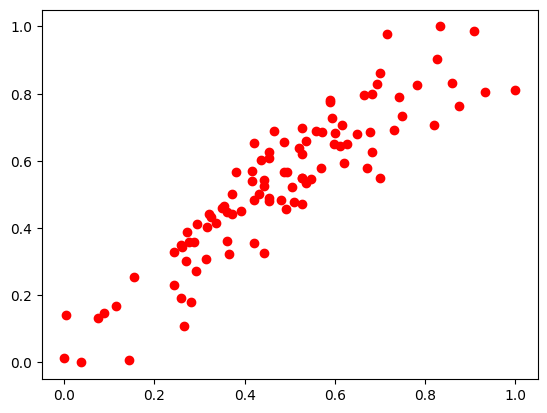

In [ ]:
import matplotlib.pyplot as plt


data = {'A': [ 480, 510, 426, 482, 393, 510, 542, 437, 453, 386, 434, 418, 391, 399, 486, 421, 496, 463, 508, 419, 434, 440, 405, 434, 344,
              415, 463,475,463,392,452,504,443,461,340,438,523,416,483,440,423,386,321,433,351,481,465,390,463,468,488,443,505,395,474,490,
               396,362,566,418,502,500,359,443,421,433,514,320,406,465,487,532,330,458,408,480,573,518,394,440,443,452,521,471,398,446,400,
               457,407,505,390,557,591,450, 546, 454, 553, 544, 463, 411],
        'B': [153.3,129.4,119,139.9,103.2,162.3,146.1,124.3,119.5,105.8,122.3,118.4,107.5,100,139.4,124.2,143.1,121.2,159,105.3,108.7,126.7,
              103.6,140.4,86.8,119.7,136.7,143.6,144.9,82.7,140.5,143.8,122.9,138.6,85.1,134.9,148.7,120.5,143.4,128.5,131.1,95.5,86.1,131.5,
              89,148.3,127.7,108.1,129.2,128.9,134.1,137.4,155.8,109.1,132.5,139.9,90.1,97.9,175.7,109.3,132.5,155.5,71.9,135.7,118,128.2,174.6,
              72.6,113.8,140.9,146,158.7,71.1,121.7,117,153.9,156.5,144.4,112.1,105.7,121.9,131,154.9,143.9,109,144,114.6,126.4,118,137.5,91.4,
              151.9,156.9,122.3,177,131.1,159.1,166.7,129.1,115.2]}
N = 100 # Размер выборки

minA = min(data['A'])
maxA = max(data['A'])
avgA = sum(data['A']) / N
for i in range(len(data['A'])):
  data['A'][i] = (data['A'][i] - minA) / (maxA - minA)

minB = min(data['B'])
maxB = max(data['B'])
avgB = sum(data['B']) / N
for i in range(len(data['B'])):
  data['B'][i] = (data['B'][i] - minB) / (maxB - minB)

plt.scatter(data["A"], data["B"], c ="red")

2. Определить «грубую» верхнюю оценку количества кластеров: $\widetilde k= \sqrt{\frac{N}{2}}$, где N – число точек.

In [ ]:
print((N / 2) ** 0.5)

7.0710678118654755


3. Реализовать алгоритм k-means в двух вариантах.

3.1. Пересчет центра кластера осуществляется после каждого изменения его состава

1.0
34
22
85
30
93
Начальные центры:
(0.07; 0.13) (0.31; 0.31) (0.46; 0.69) (0.49; 0.66) (0.48; 0.48) 
1 шаг процедуры:
(0.14; 0.13) (0.33; 0.38) (0.71; 0.76) (0.50; 0.64) (0.48; 0.52) 
F1: 9.61
F2: 153.06
F3: 0.06

2 шаг процедуры:
(0.14; 0.13) (0.37; 0.43) (0.77; 0.85) (0.54; 0.63) (0.72; 0.65) 
F1: 9.96
F2: 169.26
F3: 0.06

3 шаг процедуры:
(0.14; 0.13) (0.37; 0.43) (0.80; 0.84) (0.55; 0.64) (0.70; 0.61) 
F1: 9.96
F2: 180.18
F3: 0.06

Найдено устойчивое состояние! 3 совпадает с 4


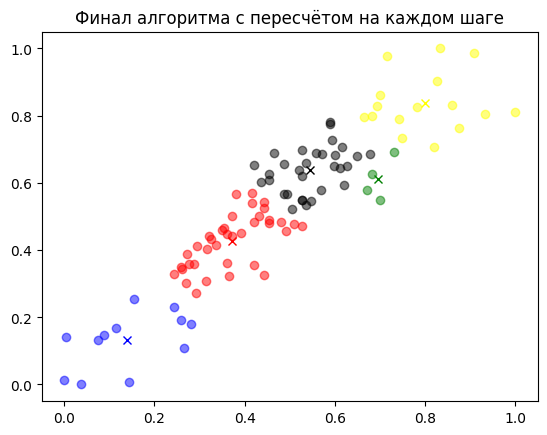

In [ ]:
from math import sqrt
import matplotlib.pyplot as plt
import copy

clusters_number = 5


def calculate_centers(sample):
    min_val, max_val = min(sample), max(sample)
    h = (max_val - min_val) / (clusters_number)
    borders = [min_val]
    for i in range(clusters_number):
        borders.append(borders[i] + h)

    centers = []
    for i in range(clusters_number):
        centers.append((borders[i] + borders[i + 1]) / 2)
    return centers


def find_closest_point(im_point, sample):
    index = 0
    current_distance = get_distance(im_point, sample[0])
    for i in range(1, len(sample)):
        dist = get_distance(im_point, sample[i])
        if dist < current_distance:
            current_distance = dist
            index = i
    return index


def get_distance(p1, p2):
    return sqrt((pow(p2[0] - p1[0], 2) + pow(ncf * (p2[1] - p1[1]), 2)))


def find_closest_cluster(point, centers):
    ds = [get_distance(point, i) for i in centers]
    return ds.index(min(ds))


def recalculate_center(cluster, cl_index, centers):
    mid_x = sum([i[0] for i in cluster]) / len(cluster)
    mid_y = sum([i[1] for i in cluster]) / len(cluster)
    centers[cl_index] = [mid_x, mid_y]


def recalculate_all_centers(clusters, centers):
    for i, cluster in enumerate(clusters):
        recalculate_center(cluster, i, centers)


def init():
    sample_2D = list(zip(data['A'], data['B']))
    im_centers = list(zip(calculate_centers(data['A']), calculate_centers(data['B'])))
    pointsPull = sample_2D[:]
    centers = []
    for im_center in im_centers:
        index = find_closest_point(im_center, pointsPull)
        print(index)
        centers.append(sample_2D[index])
        del pointsPull[index]
    clusters = [[centers[i]] for i in range(clusters_number)]
    return clusters, centers, pointsPull


def compare_clusters(clusters_1, clusters_2):
    if len(clusters_1) != len(clusters_2):
        return False
    for i in range(clusters_number):
        if len(clusters_1[i]) == len(clusters_2[i]):
            for j in range(len(clusters_2[i])):
                if clusters_1[i][j] != clusters_2[i][j]:
                    return False
        else:
            return False
    return True


def F_1(clusters, centers):
    result = 0
    for i, cluster in enumerate(clusters):
        for elem in cluster:
            result += get_distance(elem, centers[i])
    return result


def F_2(clusters):
    result = 0
    for cluster in clusters:
        for i in range(len(cluster)):
            for j in range(i, len(cluster)):
                result += get_distance(cluster[i], cluster[j])
    return result


def F_3(clusters, centers):
    result = 0
    for i, cluster in enumerate(clusters):
        sigma = 0
        for elem in cluster:
            sigma += pow(get_distance(elem, centers[i]), 2)
        sigma /= len(cluster)
        result += sigma
    return result


def k_algo_1():
    clusters, centers, pointsPull = init()
    print("Начальные центры:")
    for elem in centers:
        print(f"({elem[0]:.2f}; {elem[1]:.2f})", end=" ")
    print(end="\n")
    old_clusters = []

    for i in range(10):
        for point in pointsPull:
            index = find_closest_cluster(point, centers)
            clusters[index].append(point)
            recalculate_center(clusters[index], index, centers)
        pointsPull = list(zip(data['A'], data['B']))

        if compare_clusters(clusters, old_clusters):
            print(f"Найдено устойчивое состояние! {i} совпадает с {i + 1}")

            colors = ["blue", "red", "yellow", "black", "green", "cyan", "grey", "blue", "red", "yellow"]
            fig, ax = plt.subplots()
            for j, cluster in enumerate(clusters):
                for point in cluster:
                    ax.plot(point[0], point[1], 'o', color=colors[j], alpha=0.5)
            for j, center in enumerate(centers):
                ax.plot(center[0], center[1], 'x', color=colors[j])
            plt.title("Финал алгоритма с пересчётом на каждом шаге")
            plt.show()
            break
        else:
            print(f"{i + 1} шаг процедуры:")
            for elem in centers:
                print(f"({elem[0]:.2f}; {elem[1]:.2f})", end=" ")
            print(end="\n")
            print(f"F1: {F_1(clusters, centers):.2f}")
            print(f"F2: {F_2(clusters):.2f}")
            print(f"F3: {F_3(clusters, centers):.2f}")
            print(end="\n")

            old_clusters = copy.deepcopy(clusters)
            clusters.clear()
            for _ in range(len(old_clusters)):
                clusters.append([])


ncf = (max(data['A']) - min(data['A'])) / (max(data['B']) - min(data['B']))
print(ncf)

k_algo_1()


3.2. Пересчет центра кластера осуществляется лишь после того, как будет завершен просмотр всех данных (шаг процедуры).

Начало алгоритма с пересчётом центра после просмотра всех данных
34
22
85
30
93
Начальные центры:
(0.07; 0.13) (0.31; 0.31) (0.46; 0.69) (0.49; 0.66) (0.48; 0.48) 
1 шаг процедуры:
(0.10; 0.11) (0.31; 0.34) (0.64; 0.82) (0.64; 0.69) (0.46; 0.51) 
F1: 10.81
F2: 179.09
F3: 0.09

2 шаг процедуры:
(0.10; 0.11) (0.31; 0.34) (0.77; 0.85) (0.64; 0.67) (0.46; 0.53) 
F1: 9.12
F2: 137.85
F3: 0.06

3 шаг процедуры:
(0.10; 0.11) (0.31; 0.34) (0.80; 0.84) (0.61; 0.67) (0.46; 0.54) 
F1: 8.65
F2: 129.53
F3: 0.05

4 шаг процедуры:
(0.10; 0.11) (0.31; 0.35) (0.80; 0.84) (0.60; 0.66) (0.46; 0.54) 
F1: 8.58
F2: 124.29
F3: 0.05

5 шаг процедуры:
(0.10; 0.11) (0.32; 0.36) (0.80; 0.84) (0.60; 0.66) (0.46; 0.53) 
F1: 8.55
F2: 123.10
F3: 0.05

Найдено устойчивое состояние! 5 совпадает с 6


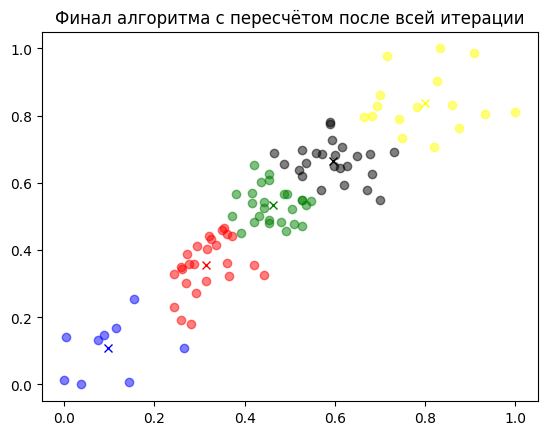

In [ ]:
def k_algo_2(sample_density, sample_elastic):
    print("Начало алгоритма с пересчётом центра после просмотра всех данных")
    clusters, centers, pointsPull = init()
    print("Начальные центры:")
    for elem in centers:
        print(f"({elem[0]:.2f}; {elem[1]:.2f})", end=" ")
    print(end="\n")
    old_clusters = []

    for i in range(10):
        for point in pointsPull:
            index = find_closest_cluster(point, centers)
            clusters[index].append(point)
        recalculate_all_centers(clusters, centers)  # Пересчитываем центры после подсчёт статистики

        if compare_clusters(clusters, old_clusters):
            print(f"Найдено устойчивое состояние! {i} совпадает с {i + 1}")

            colors = ["blue", "red", "yellow", "black", "green", "cyan", "grey", "blue", "red", "yellow"]
            fig, ax = plt.subplots()
            for j, cluster in enumerate(clusters):
                for point in cluster:
                    ax.plot(point[0], point[1], 'o', color=colors[j], alpha=0.5)
            for j, center in enumerate(centers):
                ax.plot(center[0], center[1], 'x', color=colors[j])
            plt.title("Финал алгоритма с пересчётом после всей итерации")
            plt.show()
            break
        else:
            print(f"{i + 1} шаг процедуры:")
            for elem in centers:
                print(f"({elem[0]:.2f}; {elem[1]:.2f})", end=" ")
            print(end="\n")
            print(f"F1: {F_1(clusters, centers):.2f}")
            print(f"F2: {F_2(clusters):.2f}")
            print(f"F3: {F_3(clusters, centers):.2f}")
            print(end="\n")

            pointsPull = list(zip(sample_density, sample_elastic))
            old_clusters = copy.deepcopy(clusters)
            clusters.clear()
            for _ in range(len(old_clusters)):
                clusters.append([])


k_algo_2(data['A'], data['B'])


4. На каждом шаге процедуры разбиения методом k-means вычислять функционалы качества полученного разбиения:

При пересчете на каждом шаге:\
1 шаг:
$F_1$: 9.61
$F_2$: 153.06
$F_3$: 0.06

2 шаг:
$F_1$: 9.96
$F_2$: 169.26
$F_3$: 0.06

3 шаг:
$F_1$: 9.96
$F_2$: 180.18
$F_3$: 0.06

При просмотре после того, как будет завершен просмотр всех данных:\
1 шаг:
$F_1$: 10.81
$F_2$: 179.09
$F_3$: 0.09

2 шаг:
$F_1$: 9.12
$F_2$: 137.85
$F_3$: 0.06

3 шаг:
$F_1$: 8.65
$F_2$: 129.53
$F_3$: 0.05

4 шаг:
$F_1$: 8.58
$F_2$: 124.29
$F_3$: 0.05

5 шаг:
$F_1$: 8.55
$F_2$: 123.10
$F_3$: 0.05

5. Отобразить полученные кластеры, выделить каждый кластер разным цветом, отметить центроиды.

Полученные кластеры были отображены в пункте 3.

6. Содержательно проинтерпретировать полученные результаты.

После реализации двух вариантов алгоритма k-means видно, что
количество шагов, необходимых для сходимости, разное. И более точную оценку их
работоспособности помогут дать функционалы качества. Из
пункта 4 видно, что при алгоритме с пересчетом после после того, как будет завершен просмотр всех данных, позволяет лучше минимизировать данные
функционалы, поэтому можно сделать вывод, что пересчет центров кластеров после обработки каждой отдельной точки приводит к более эффективному разделению данных в рассматриваемом случае.

##Вывод

В результате практической работы было нормализовано множество точек. Далее была определена "грубая" верхняя оценка количества кластеров. Кроме того был реализован алгорим k-means в двух варинтах: пересчет центра кластера после каждого изменения его состава и пересчет центра кластера лишь после того, как будет завершен просмотр всех данных. Также на каждом шаге процедуры были вычеслены функционалы качества: сумма по всем кластерам квадратов расстояний элементов кластеров до центров соответствующих кластеров, сумма по всем кластерам внутрикластерных расстояний между элементами кластеров и сумма по всем кластерам внутрикластерных дисперсий (относительно центров кластеров). Полученные кластеры были отображены, и каждый кластер был выделенным разным цветом. Центроиды также были отмечены на графиках.
